In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/airbnb-listings/exports/csv?lang=en&facet=facet(name%3D%22host_verifications%22%2C%20disjunctive%3Dtrue)&facet=facet(name%3D%22amenities%22%2C%20disjunctive%3Dtrue)&facet=facet(name%3D%22features%22%2C%20disjunctive%3Dtrue)&qv1=(Madrid)&timezone=Europe%2FBerlin&use_labels=true&csv_separator=%3B', sep = ';')

In [2]:
data.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

Vemos que Features puedee contener información que puede llegar a modificar el precio del alquiler, decidimos convertir esta información en columnas booleanas para trabajar con ella.

In [3]:
data['Profile Pic'] = data['Features'].str.contains('Host Has Profile Pic')
data['Identity Verified'] = data['Features'].str.contains('Host Identity Verified')
data['Location Exact'] = data['Features'].str.contains('Is Location Exact')
data['Instant Bookable'] = data['Features'].str.contains('Instant Bookable')
data['License Required'] = data['Features'].str.contains('Requires License')
data['Guest Pic Required'] = data['Features'].str.contains('Require Guest Profile Picture')
data['Superhost'] = data['Features'].str.contains('Host Is Superhost')
data['Guest Phone Verification'] = data['Features'].str.contains('Require Guest Phone Verification')

In [4]:
data.columns=[col.lower().replace(" ","_") for col in data.columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 97 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14780 non-null  int64  
 1   listing_url                     14780 non-null  object 
 2   scrape_id                       14780 non-null  int64  
 3   last_scraped                    14780 non-null  object 
 4   name                            14779 non-null  object 
 5   summary                         14189 non-null  object 
 6   space                           10888 non-null  object 
 7   description                     14774 non-null  object 
 8   experiences_offered             14780 non-null  object 
 9   neighborhood_overview           9134 non-null   object 
 10  notes                           5644 non-null   object 
 11  transit                         9066 non-null   object 
 12  access                          

Vemos en forma de cuadro los distintos países que se incluyen en el dataset. Decidimos trabajar con el país que mayor datos tiene.

C:\Users\greta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Countries')

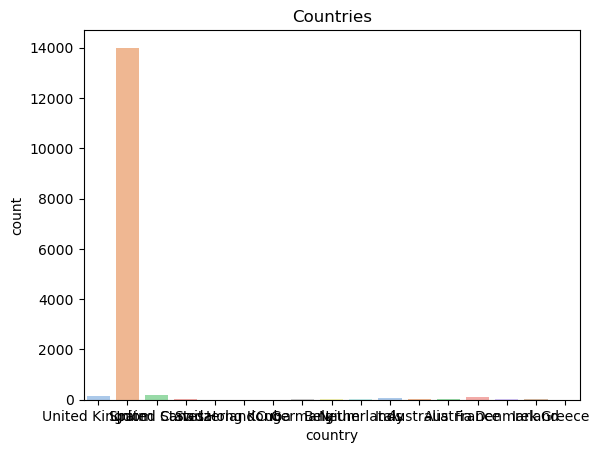

In [6]:
sns.countplot(data['country'], palette = "pastel")
plt.title("Countries")

In [7]:
data = data[data['country']=='Spain']

In [9]:
data.city.values_counts()

AttributeError: 'Series' object has no attribute 'values_counts'

Vemos también que los datos son mayoritariamente de Madrid. Limpiamos para quedarnos solo con datos de Madrid, corrigierndo errores de zipcode y ciudad escrito con otro formato.

In [18]:
data = data[data['zipcode'].str.startswith('28', na=False)]

In [19]:
print(data['zipcode'].unique())

['28005' '28013' '28012' '28014' '28004' '28015' '28008' '28045' '28017'
 '28027' '28043' '28021' '28003' '28010' '28002' '28016' '28036' '28039'
 '28020' '28046' '28029' '28028' '28006' '28001' '28009' '28007' '28035'
 '28011' '28047' '28024' '28044' '28019' '28025' '28038' '28053' '28026'
 '28018' '28030' '28031' '28051' '28052' '28032' '28037' '28022' '28042'
 '28041' '28054' '28058' '28034' '28050' '28049' '28023' '28033' '28055'
 '28850' '28040' '28056' '28290' '28060' '28' '28660' '28830' '2805'
 '28730' '28094' '2804' '2815' '28105' '28224' '28048']


In [20]:
data=data.replace({'28002\n28002' : '28002', '2802\n28012' : '28012', '28051\n28051': '28051', '280013': '28013'})
print(data['zipcode'].unique())

['28005' '28013' '28012' '28014' '28004' '28015' '28008' '28045' '28017'
 '28027' '28043' '28021' '28003' '28010' '28002' '28016' '28036' '28039'
 '28020' '28046' '28029' '28028' '28006' '28001' '28009' '28007' '28035'
 '28011' '28047' '28024' '28044' '28019' '28025' '28038' '28053' '28026'
 '28018' '28030' '28031' '28051' '28052' '28032' '28037' '28022' '28042'
 '28041' '28054' '28058' '28034' '28050' '28049' '28023' '28033' '28055'
 '28850' '28040' '28056' '28290' '28060' '28' '28660' '28830' '2805'
 '28730' '28094' '2804' '2815' '28105' '28224' '28048']


In [21]:
data = data.drop(data[data['zipcode']=='28'].index)
data = data.drop(data[data['zipcode']=='2805'].index)
data = data.drop(data[data['zipcode']=='2815'].index)
data = data.drop(data[data['zipcode']=='2804'].index)
print(data['zipcode'].unique())

['28005' '28013' '28012' '28014' '28004' '28015' '28008' '28045' '28017'
 '28027' '28043' '28021' '28003' '28010' '28002' '28016' '28036' '28039'
 '28020' '28046' '28029' '28028' '28006' '28001' '28009' '28007' '28035'
 '28011' '28047' '28024' '28044' '28019' '28025' '28038' '28053' '28026'
 '28018' '28030' '28031' '28051' '28052' '28032' '28037' '28022' '28042'
 '28041' '28054' '28058' '28034' '28050' '28049' '28023' '28033' '28055'
 '28850' '28040' '28056' '28290' '28060' '28660' '28830' '28730' '28094'
 '28105' '28224' '28048']


In [24]:
data.loc[data['city'] != 'Madrid', 'city'] = 'Madrid'

Con los datos especificos ya limpios y decididos nos deshacemos de columnas con las que no trabajaremos

In [25]:
data = data.drop(columns = ['listing_url','summary','thumbnail_url','host_total_listings_count', 'medium_url','host_url',
'experiences_offered', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_thumbnail_url',
'host_picture_url','access', 'interaction', 'house_rules', 'host_id', 'host_name', 'host_location', 'host_about', 
'host_listings_count', 'host_verifications', 'neighbourhood', 'city', 'state',  'market', 'smart_location', 'country_code', 
'country', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'weekly_price', 'monthly_price', 'guests_included', 
'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 
'availability_90', 'calendar_last_scraped', 'first_review', 'last_review',  'review_scores_accuracy', 'review_scores_cleanliness',
'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'license', 'jurisdiction_names', 'features', 
'scrape_id', 'last_scraped', 'name', 'space', 'description', 'notes', 'transit', 'street', 'review_scores_rating',
'neighborhood_overview', 'reviews_per_month', 'xl_picture_url'])

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12872 entries, 3 to 14741
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12872 non-null  int64  
 1   picture_url                     12844 non-null  object 
 2   host_since                      12869 non-null  object 
 3   host_neighbourhood              9843 non-null   object 
 4   neighbourhood_cleansed          12872 non-null  object 
 5   neighbourhood_group_cleansed    12872 non-null  object 
 6   zipcode                         12872 non-null  object 
 7   latitude                        12872 non-null  float64
 8   longitude                       12872 non-null  float64
 9   property_type                   12872 non-null  object 
 10  room_type                       12872 non-null  object 
 11  bed_type                        12872 non-null  object 
 12  square_feet                     

Creamos un mapa de correlación para visualizar que columnas tienen una relación mayor y plantear el modelo de regresión

Index(['id', 'picture_url', 'host_since', 'host_neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'zipcode',
       'latitude', 'longitude', 'property_type', 'room_type', 'bed_type',
       'square_feet', 'price', 'security_deposit', 'cleaning_fee',
       'availability_365', 'number_of_reviews', 'review_scores_value',
       'cancellation_policy', 'calculated_host_listings_count', 'geolocation',
       'profile_pic', 'identity_verified', 'location_exact',
       'instant_bookable', 'license_required', 'guest_pic_required',
       'superhost', 'guest_phone_verification'],
      dtype='object')

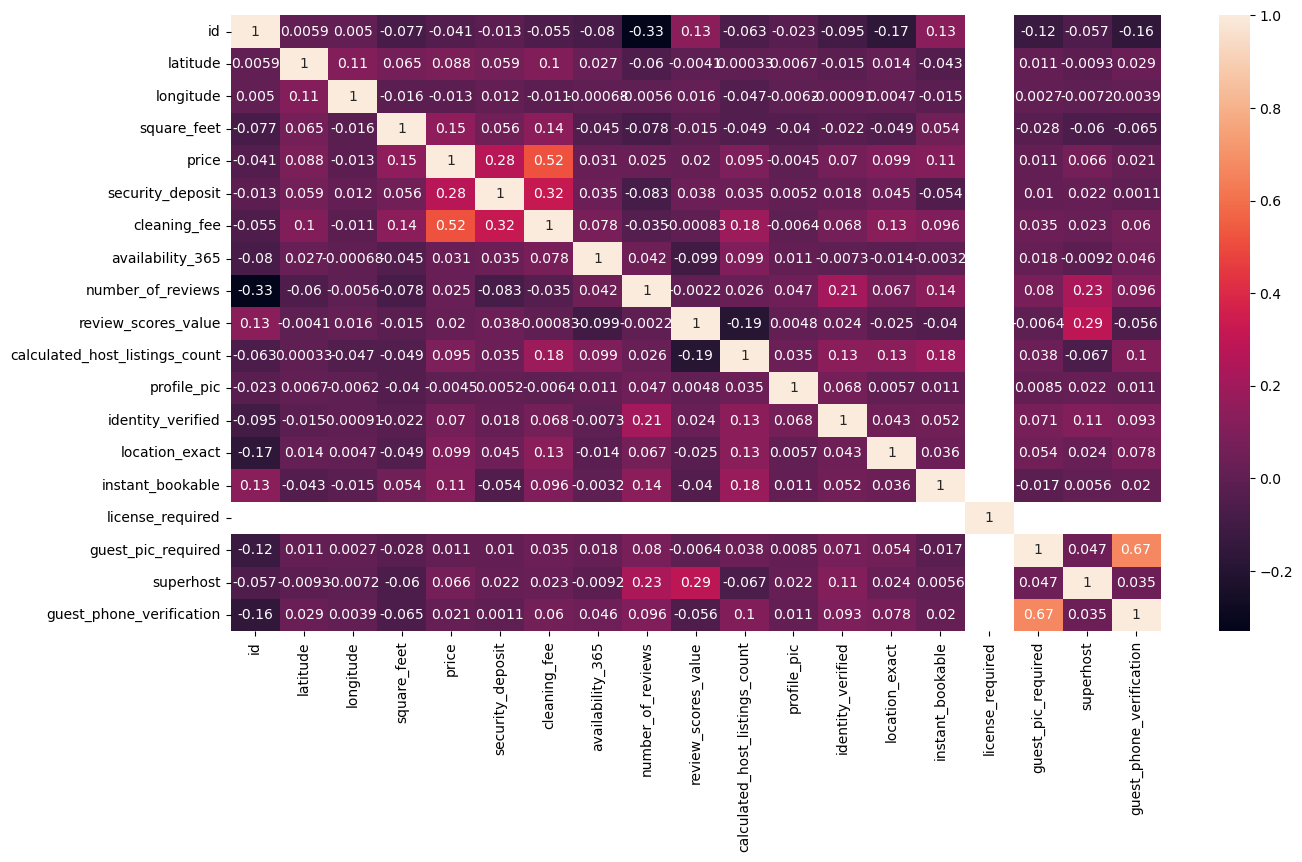

In [27]:
corr = data.corr(method='kendall')
plt.figure(figsize=(15,8), facecolor = 'white')
sns.heatmap(corr, annot=True,)
data.columns

Hacemos un par de boxplot para comparar la relación que tienen lo alquilados que estan los airbnb si tienen foto de perfil los host o si es superhost.

<AxesSubplot:xlabel='profile_pic', ylabel='availability_365'>

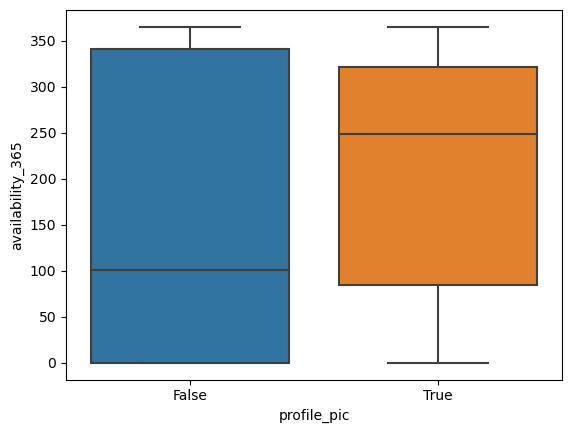

In [28]:
sns.boxplot(x='profile_pic', y="availability_365",data=data)

<AxesSubplot:xlabel='superhost', ylabel='availability_365'>

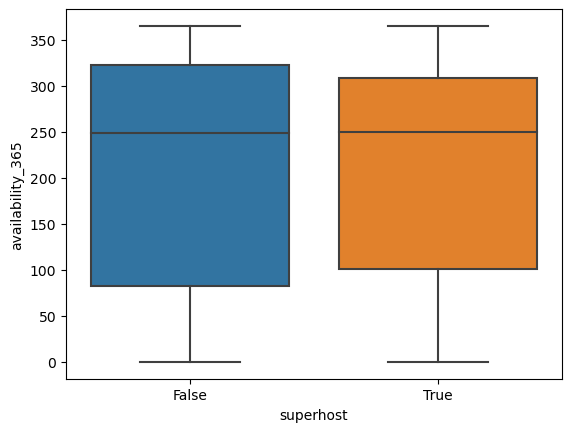

In [29]:
sns.boxplot(x='superhost', y="availability_365",data=data)

In [ ]:
data.to_csv('data1.csv')
from google.colab import files 
files.download('data1.csv')

Descargamos una version limpia del Dataset para continuar trabajando en Tablau y RStudio.

Guardamos 2 copias, una transformando los NaN a 0 y otra sin contar los NaN, se comparan con boxplot. No se continúa con esta información en Tableau ni en el modelo de regresión

In [30]:
test_data = data.copy()

In [31]:
test_data["price"] = data["price"].fillna(0)
test_data["security_deposit"] = data["security_deposit"].fillna(0)
test_data["cleaning_fee"] = data["cleaning_fee"].fillna(0)

In [32]:
test_data["sum_price"] = test_data.price + test_data.security_deposit + test_data.cleaning_fee

In [33]:
prueba = data.copy()

In [34]:
prueba=data.dropna(subset=["security_deposit"])
prueba=prueba.dropna(subset=["cleaning_fee"])
prueba=prueba.dropna(subset=["review_scores_value"])
prueba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3761 entries, 4 to 14737
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3761 non-null   int64  
 1   picture_url                     3756 non-null   object 
 2   host_since                      3761 non-null   object 
 3   host_neighbourhood              3202 non-null   object 
 4   neighbourhood_cleansed          3761 non-null   object 
 5   neighbourhood_group_cleansed    3761 non-null   object 
 6   zipcode                         3761 non-null   object 
 7   latitude                        3761 non-null   float64
 8   longitude                       3761 non-null   float64
 9   property_type                   3761 non-null   object 
 10  room_type                       3761 non-null   object 
 11  bed_type                        3761 non-null   object 
 12  square_feet                     2

In [35]:
prueba['total_price'] = prueba['price'] + prueba['security_deposit']+ prueba['cleaning_fee']
prueba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3761 entries, 4 to 14737
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3761 non-null   int64  
 1   picture_url                     3756 non-null   object 
 2   host_since                      3761 non-null   object 
 3   host_neighbourhood              3202 non-null   object 
 4   neighbourhood_cleansed          3761 non-null   object 
 5   neighbourhood_group_cleansed    3761 non-null   object 
 6   zipcode                         3761 non-null   object 
 7   latitude                        3761 non-null   float64
 8   longitude                       3761 non-null   float64
 9   property_type                   3761 non-null   object 
 10  room_type                       3761 non-null   object 
 11  bed_type                        3761 non-null   object 
 12  square_feet                     2

<AxesSubplot:xlabel='sum_price', ylabel='room_type'>

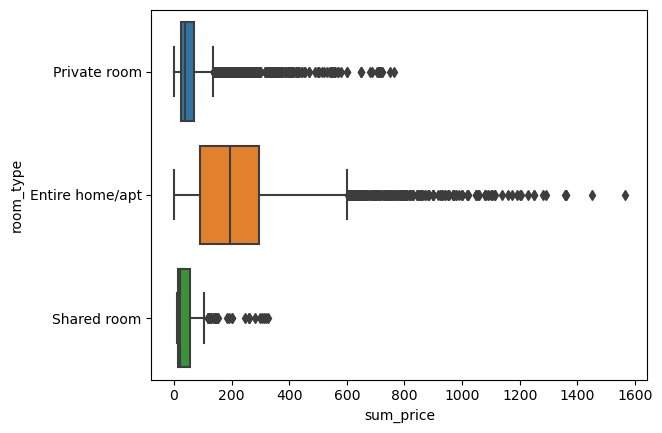

In [36]:
sns.boxplot(x="sum_price", y="room_type", data = test_data)

<AxesSubplot:xlabel='total_price', ylabel='room_type'>

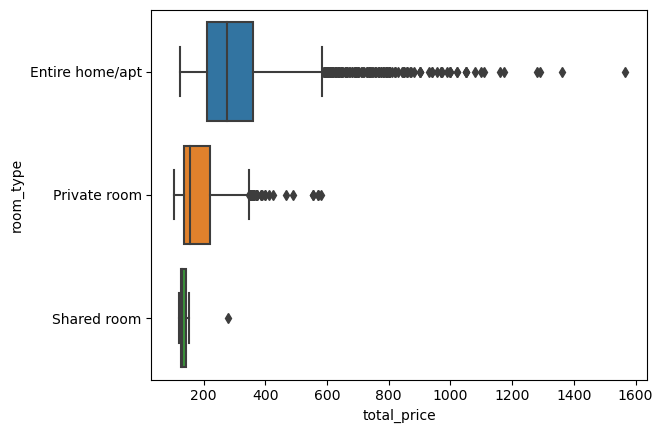

In [37]:
sns.boxplot(x="total_price", y="room_type", data = prueba)

<AxesSubplot:xlabel='price', ylabel='room_type'>

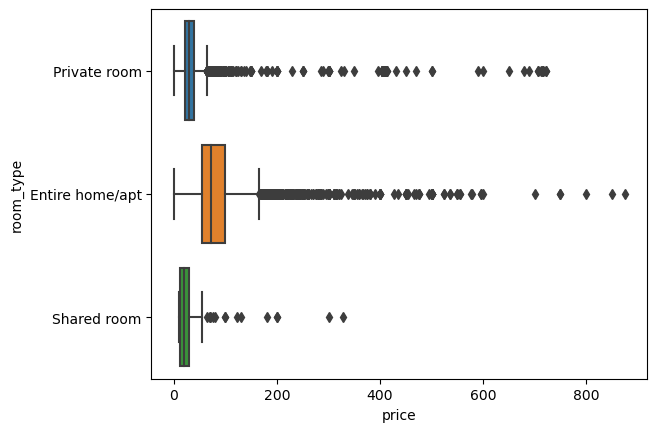

In [38]:
sns.boxplot(x="price", y="room_type", data = test_data)

<AxesSubplot:xlabel='price', ylabel='room_type'>

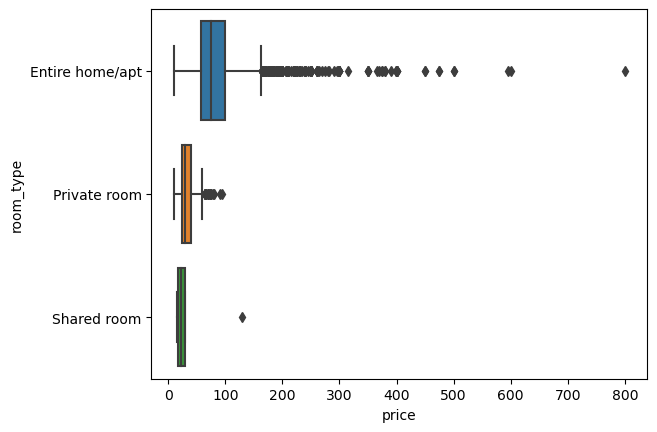

In [39]:
sns.boxplot(x="price", y="room_type", data= prueba)